In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


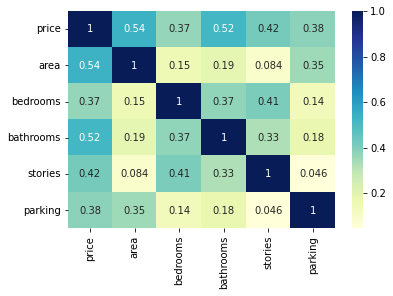

In [11]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


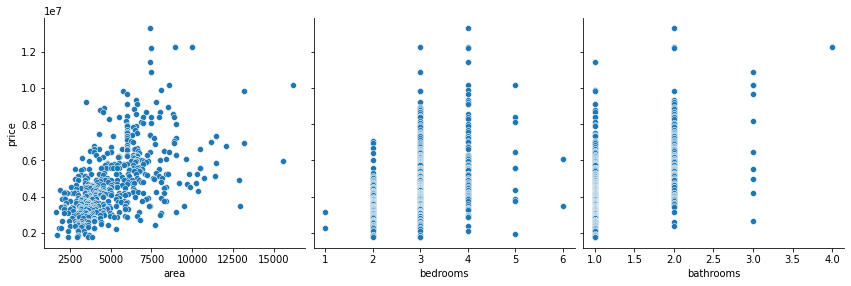

In [12]:
sns.pairplot(df, x_vars=['area', 'bedrooms', 'bathrooms'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

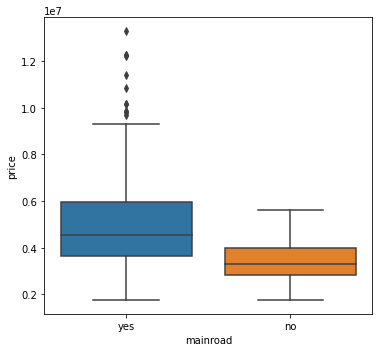

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)

In [14]:
varlist =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [13]:
def binary_map(x):
  return x.map({'yes':1,"no":0})

In [21]:
df[varlist]=df[varlist].apply(binary_map)

In [22]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
np.random.seed(0)

In [25]:
df1_train,df1_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()

In [32]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df1_train[num_vars]=scaler.fit_transform(df1_train[num_vars])

In [33]:
df1_train[num_vars].head()

,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758


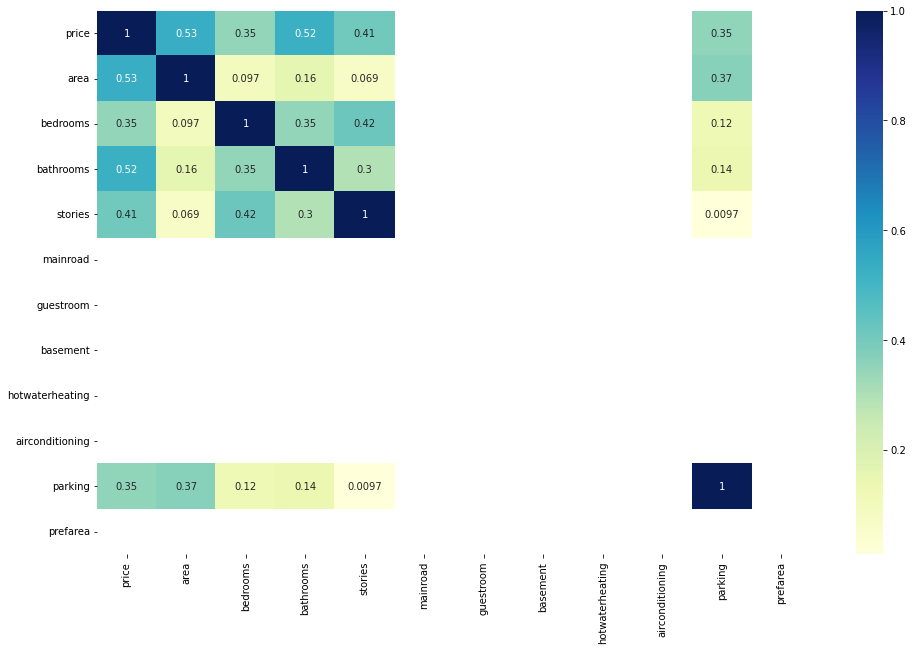

In [37]:
plt.figure(figsize = (16,10))
sns.heatmap(df1_train.corr(),annot = True, cmap="YlGnBu")
plt.show()